In [1]:
%matplotlib inline

In [97]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
import numpy as np

In [19]:
data = np.loadtxt('160602_A_T.txt')
wavelengths = data[:, 0]
observations = data[:, 1:]

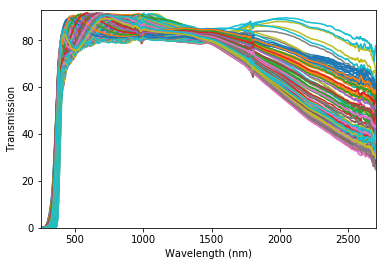

In [55]:
fig, ax = plt.subplots()

for i in np.arange(observations.shape[1]):
    ax.plot(wavelengths, observations[:, i])
    
ax.set_xlim(wavelengths[0], wavelengths[-1])
ax.set_ylim(observations.min(), observations.max() + 1)
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Transmission')

# fig.savefig('fig1.png', dpi=600, bbox_inches='tight')

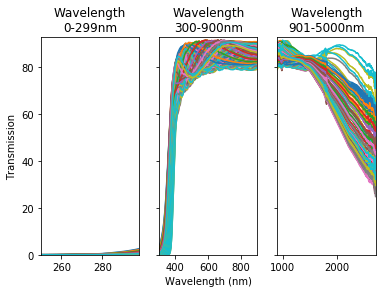

In [135]:
fig, ax = plt.subplots(ncols=3, sharey=True)

wavelength_ranges = [(0, 299), (300, 900), (901, 5000)]

for i, (lb, ub) in enumerate(wavelength_ranges):
    wlen = wavelengths[(wavelengths >= lb) & (wavelengths <= ub)]
    obs = observations[(wavelengths >= lb) & (wavelengths <= ub)]
    
    for a in np.arange(obs.shape[1]):
        ax[i].plot(wlen, obs[:, a])
    ax[i].set_title('Wavelength\n%d-%dnm' % (lb, ub))
    ax[i].set_xlim(wlen[0], wlen[-1])
    ax[i].set_ylim(observations.min(), observations.max() + 1)

ax[1].set_xlabel('Wavelength (nm)')
ax[0].set_ylabel('Transmission')

# fig.savefig('fig2.png', dpi=600, bbox_inches='tight')

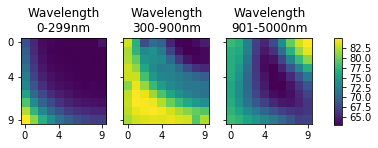

In [133]:
fig, ax = plt.subplots(ncols=3, sharey=True)

wavelength_ranges = [(0, 299), (300, 900), (901, 5000)]

for i, (lb, ub) in enumerate(wavelength_ranges):
    obs = observations[(wavelengths >= lb) & (wavelengths <= ub)]    
    storage = np.zeros(obs.shape[1])
    for a in np.arange(obs.shape[1]):
        storage[a] = np.mean(obs[:, a])
    storage = storage.reshape((10, 10))
    im = ax[i].imshow(storage)
    ax[i].set_title('Wavelength\n%d-%dnm' % (lb, ub))
    ax[i].set(adjustable='box-forced', aspect='equal')
    ax[i].set_xticks([0, 4, 9])
    ax[i].set_yticks([0, 4, 9])

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.35, 0.02, 0.3])
fig.colorbar(im, cax=cbar_ax)

# fig.savefig('fig3.png', dpi=600, bbox_inches='tight')